In [ ]:
import numpy as np 
from tqdm import tqdm
import tensorflow as tf

from helpers import plot
from pre_processing import binary, skeletonize, normalize
from models import Softmax_Regression

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

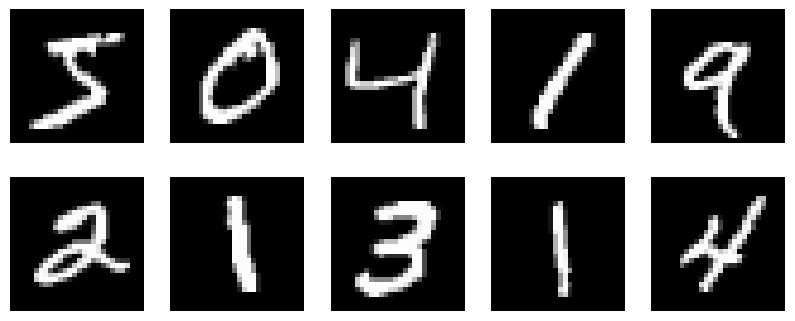

In [4]:
plot.display_imgs(x_train)

# 1. Preprocessing

- Binary
- Normalize

# 1.1. Binary

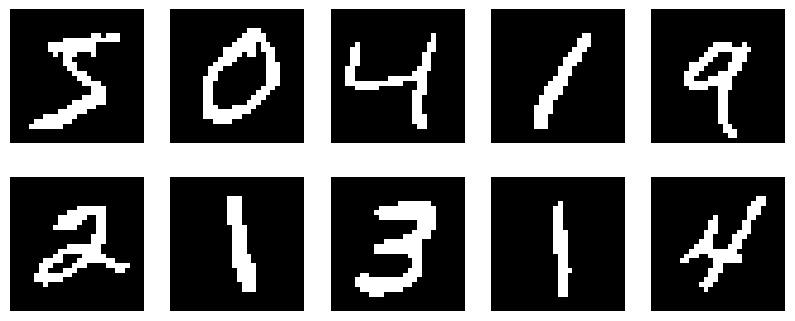

(60000, 28, 28)

In [5]:
binarized_img = [binary.binary(x_train[0])]
for i in range(1, len(x_train)):
    binarized_img.append(binary.binary(x_train[i]))

binarized = np.array(binarized_img)

plot.display_imgs(binarized)
binarized.shape


# 1.2. Normalize

In [6]:
normalized = np.array([normalize.normalize(img) for img in tqdm(binarized)])
normalized.shape

100%|██████████| 60000/60000 [00:00<00:00, 178640.53it/s]


(60000, 28, 28)

## 1.3. Encoding classes

In [11]:
classes = np.unique(y_train)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [23]:
from sklearn.preprocessing import OneHotEncoder

reshaped_y = y_train.squeeze().reshape((-1, 1))
reshaped_y

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

In [24]:
encoder = OneHotEncoder()
encoder.fit(reshaped_y)

OneHotEncoder()

In [25]:
y_train = encoder.transform(y_train.reshape((-1, 1))).toarray()

In [27]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
y_test = encoder.transform(y_test).toarray()

y_test

# 1. Softmax Regression

In [7]:
input_shape = normalized[0].shape
input_shape

(28, 28)

In [ ]:
linear_regression = Softmax_Regression.LinearRegression(input_shape)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
linear_regression.fit(normalized, y_train, epochs = 100, verbose = 1)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step - loss: nan
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - loss: nan
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - loss: nan
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step - loss: nan
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 850us/step - loss: nan
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - loss: nan
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - loss: nan
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: nan
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 927us/step - loss: nan
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - loss: nan
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step - loss: nan
Epoch 12/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 995us/step - loss: nan
Epoch 13/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: nan
Epoch 14/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - loss: nan
Epoch 15/100
1875/1875 ━━━━━━━━━━

KeyboardInterrupt: 